## Black-box exploratory data analysis

In [1]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

In [20]:
## load dataset
background_df = pd.read_pickle("../dataFrames/df_events_LHCO2020_backgroundMC_Pythia.pkl")
blackbox_df = pd.read_pickle("../dataFrames/df_events_LHCO2020_BlackBox1.pkl")

background_data_array = background_df.to_numpy()[:,3:].astype(float)
blackbox_data_array = blackbox_df.to_numpy()[:,3:].astype(float)

Histograms for all variables

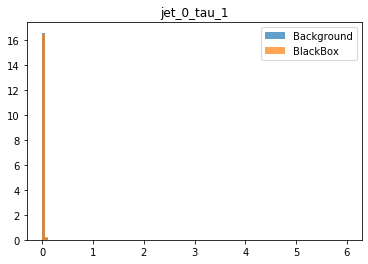

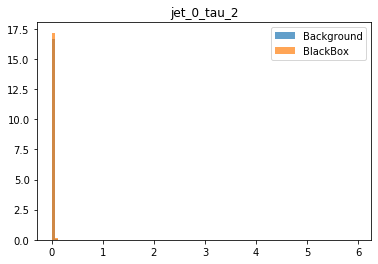

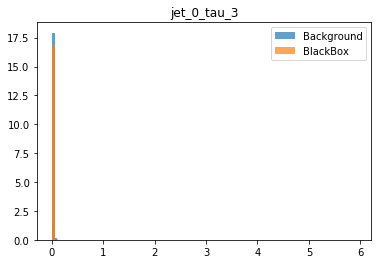

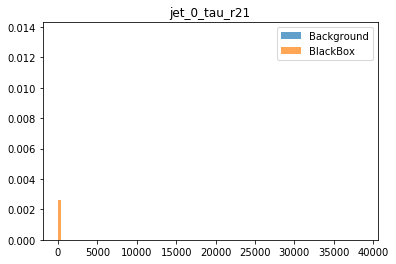

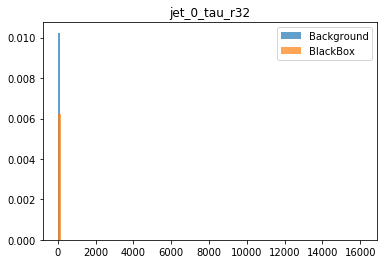

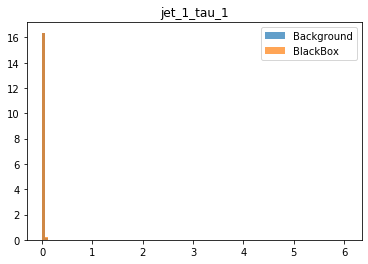

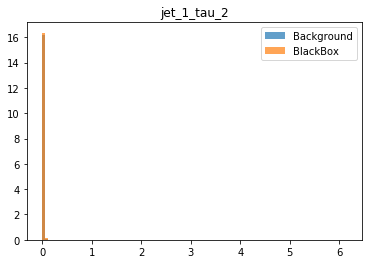

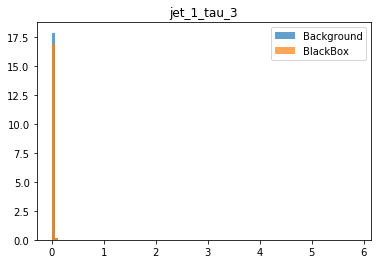

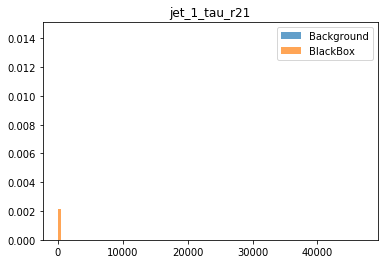

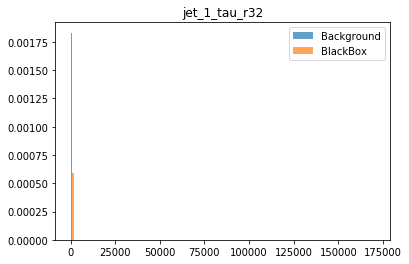

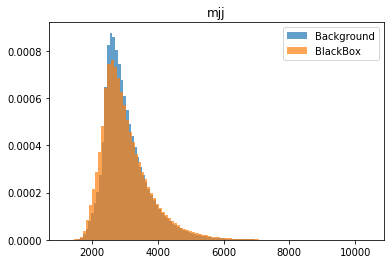

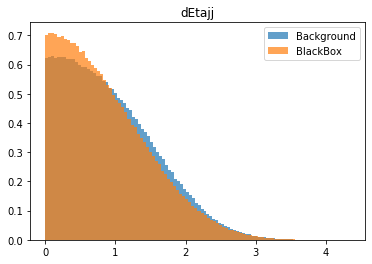

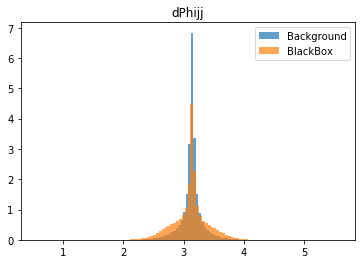

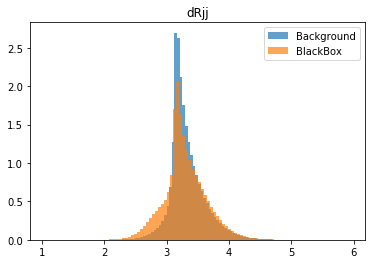

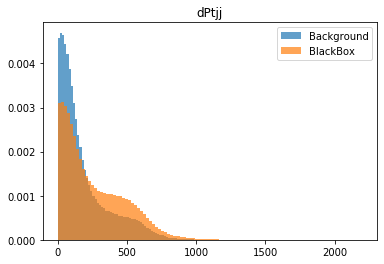

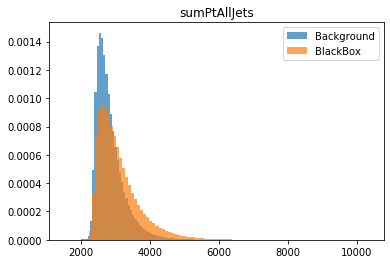

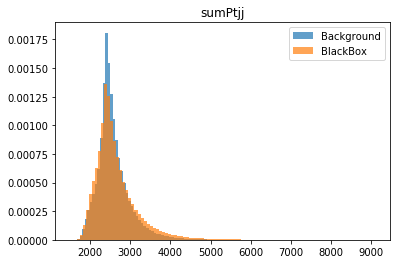

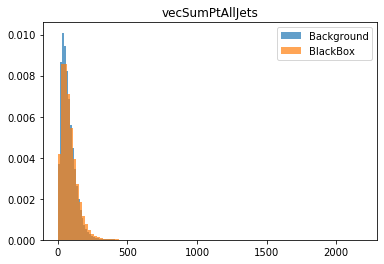

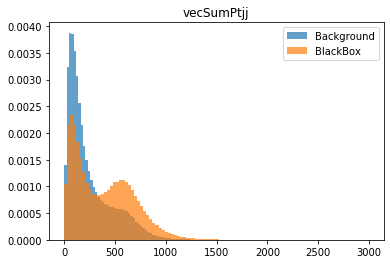

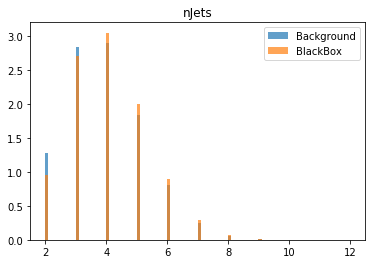

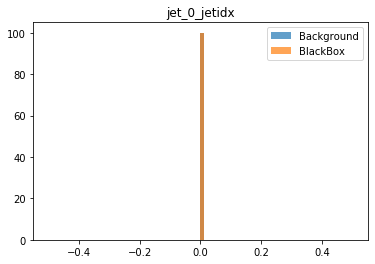

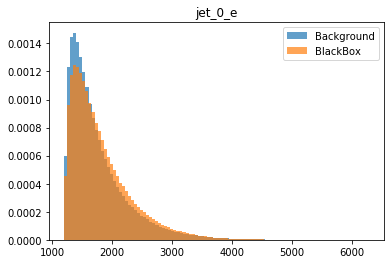

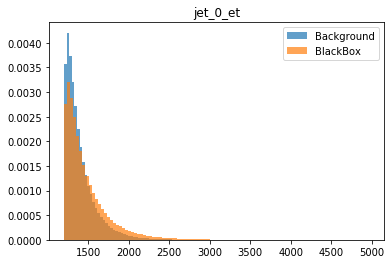

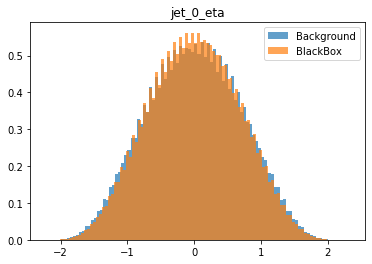

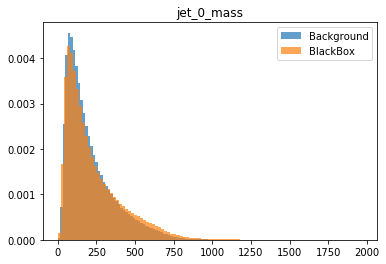

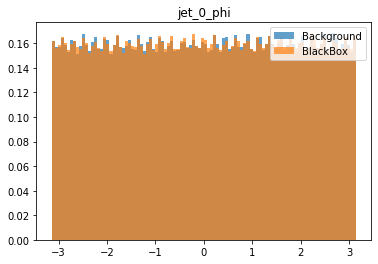

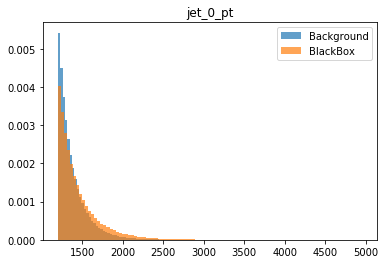

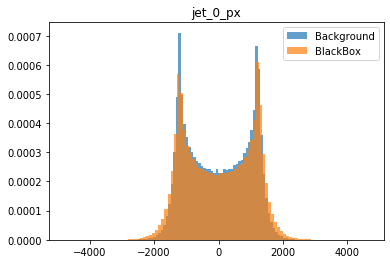

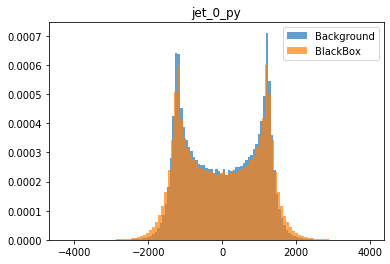

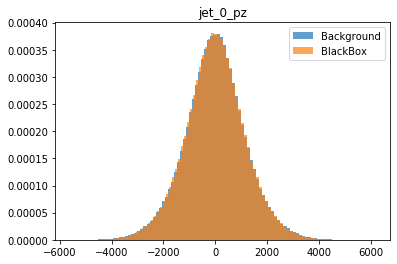

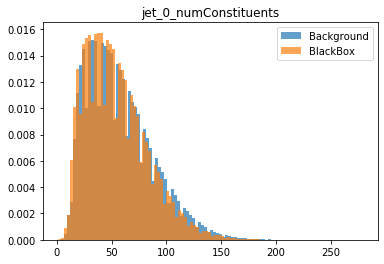

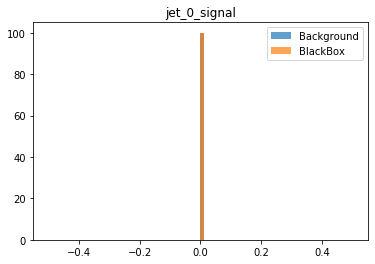

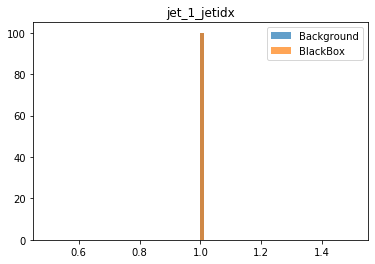

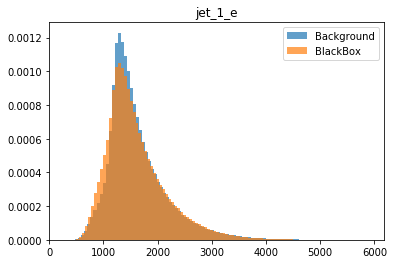

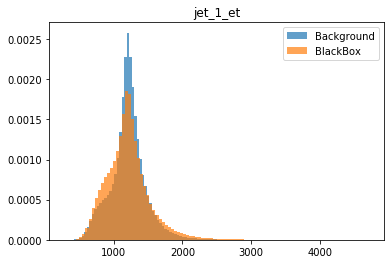

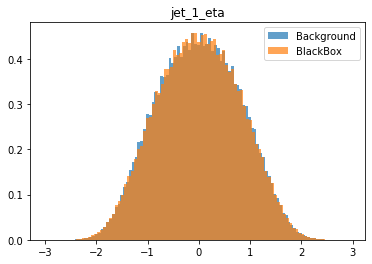

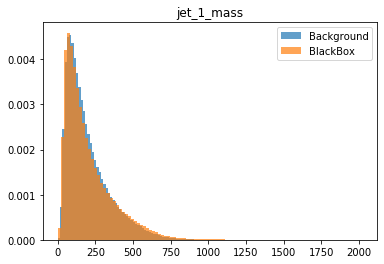

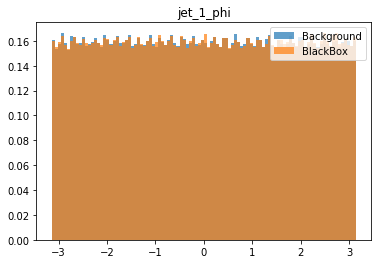

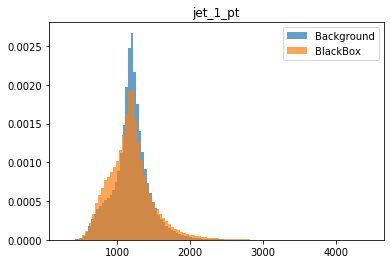

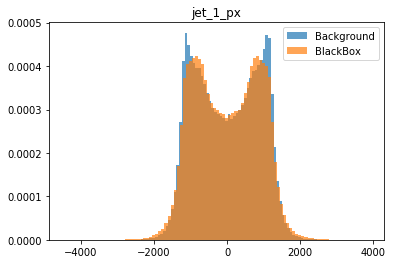

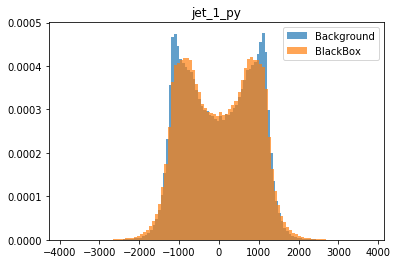

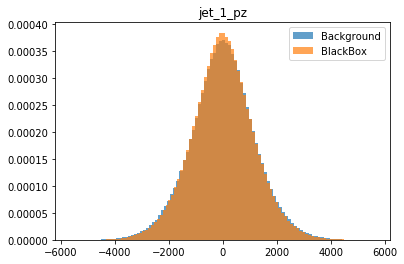

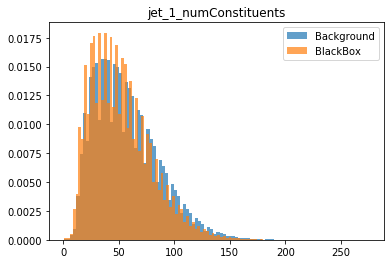

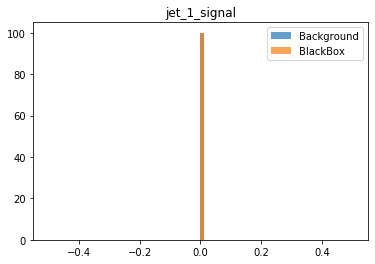

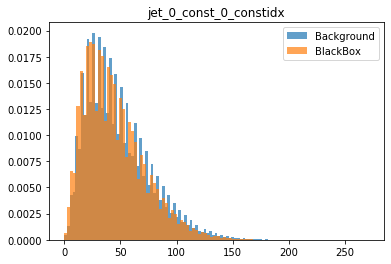

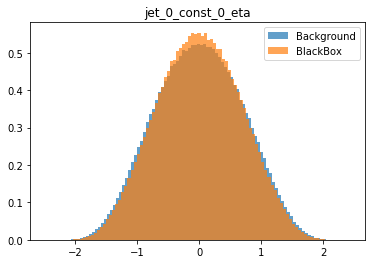

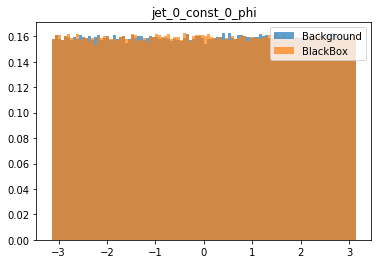

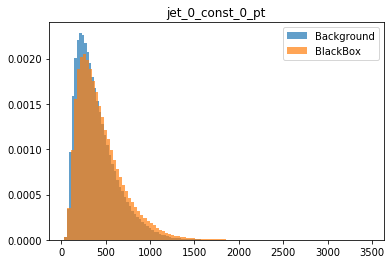

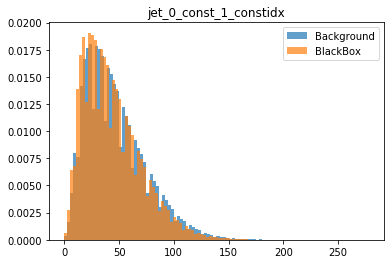

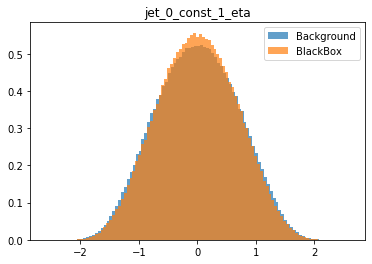

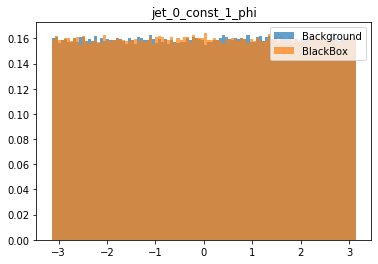

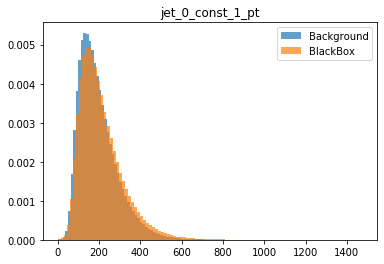

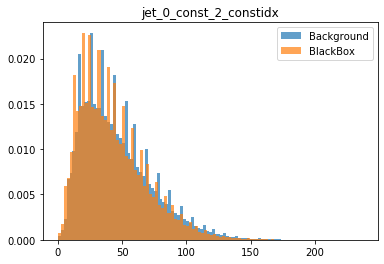

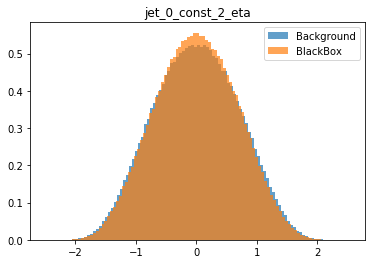

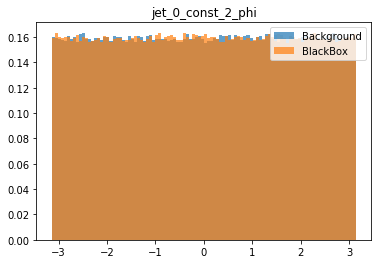

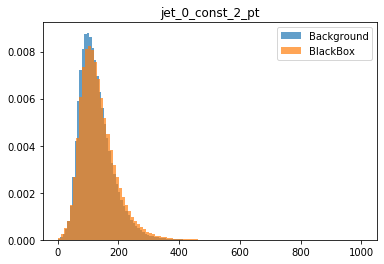

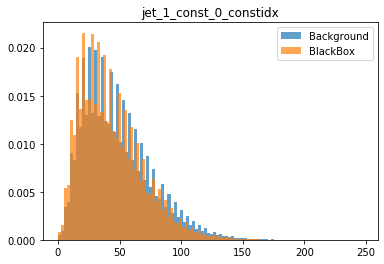

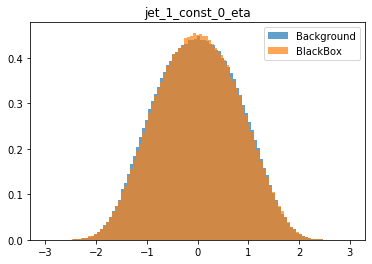

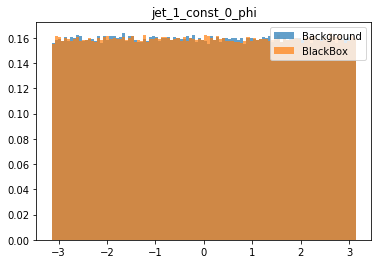

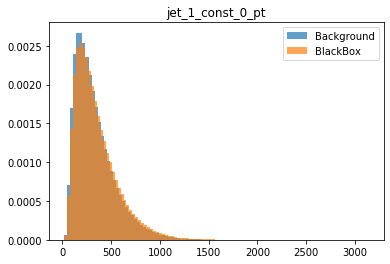

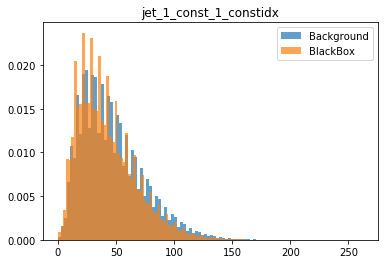

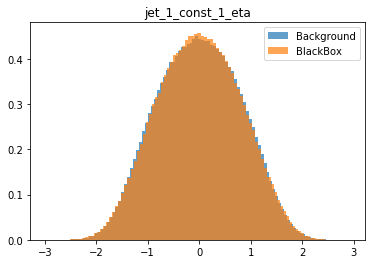

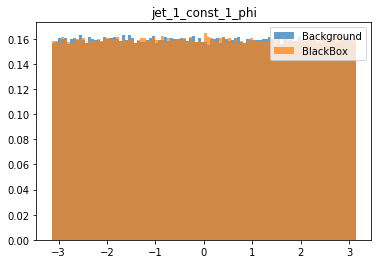

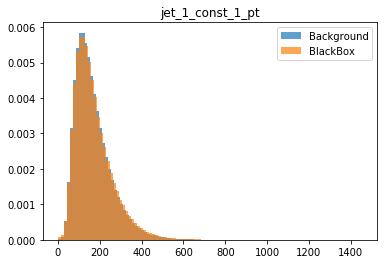

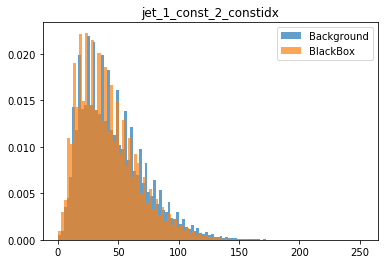

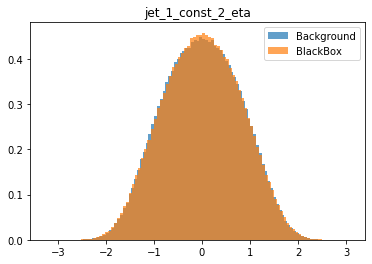

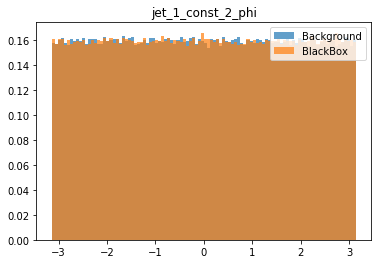

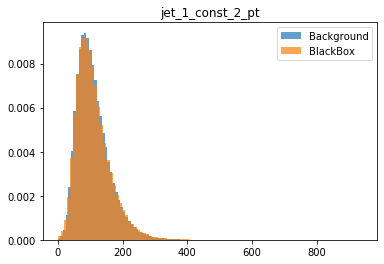

In [28]:
for param in range(background_data_array.shape[1]):
    plt.hist(background_data_array[:, param], alpha=0.7, label='Background', density=True, bins=100)
    plt.hist(blackbox_data_array[:, param], alpha=0.7, label='BlackBox', density=True, bins=100)
    plt.title(f"{df.columns[param+3]}")
    plt.legend(loc='upper right')
    plt.show()
    print()

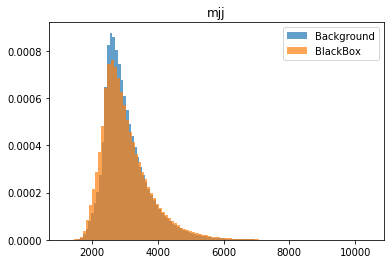

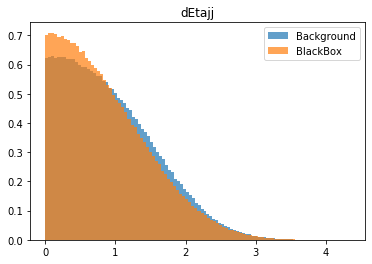

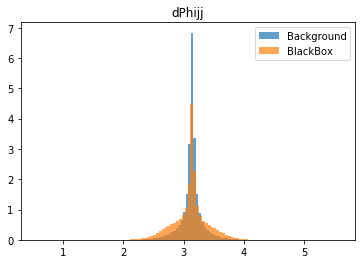

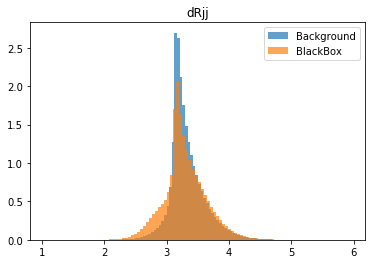

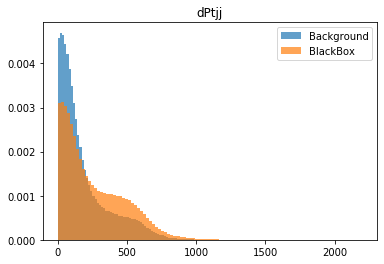

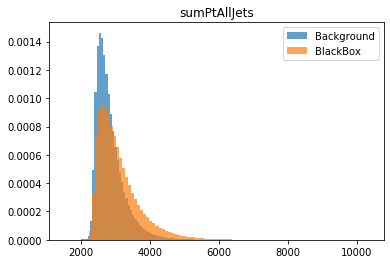

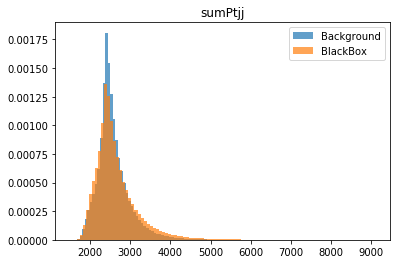

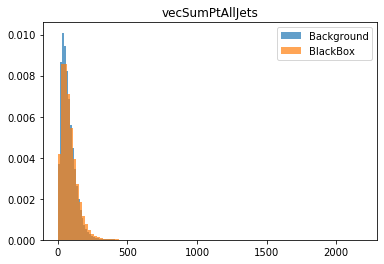

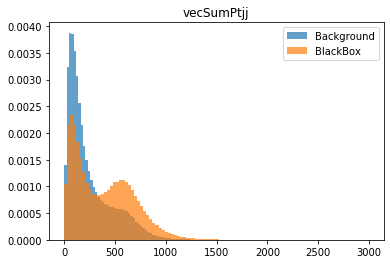

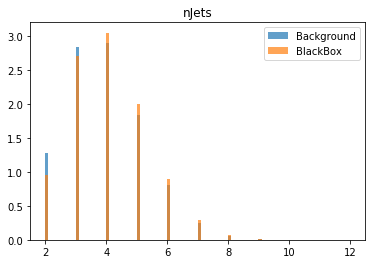

In [27]:
kin_start = 10
kin_end = 20

for param in range(kin_end - kin_start):
    plt.hist(background_data_array[:, param+kin_start], alpha=0.7, label='Background', density=True, bins=100)
    plt.hist(blackbox_data_array[:, param+kin_start], alpha=0.7, label='BlackBox', density=True, bins=100)
    plt.title(f"{df.columns[param+kin_start+3]}")
    plt.legend(loc='upper right')
    plt.show()
    print()

Now let's plot all variables against each other.

In [ ]:
num_features = kin_end - kin_start

fig, ax = plt.subplots(num_features - 1, num_features - 1, figsize=(5*num_features, 5*num_features))

for param_1 in range(num_features):
    for param_2 in range(param_1 + 1, num_features):
            this_ax = ax[param_1, param_2- 1]
            this_ax.scatter(kinematic_data_array[:, param_1], kinematic_data_array[:, param_2], alpha=0.5)
            # Get the correct labels
            this_ax.set_xlabel(f"{df.columns[param_1+kin_start]}", fontsize=14)
            this_ax.set_ylabel(f"{df.columns[param_2+kin_start]}", fontsize=14)
            this_ax.xaxis.set_tick_params(labelsize=14)
            this_ax.yaxis.set_tick_params(labelsize=14)
            
fig.suptitle("Exploratory data analysis", fontsize=20)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.savefig("eda.png")

Calculate the linear correlation coefficients as well as Spearman correlation coefficients between all pairs of variables.

In [ ]:
from scipy.stats import pearsonr, spearmanr

In [ ]:
num_features = kin_end - kin_start
kinematic_labels = df.columns[kin_start:kin_end]

In [ ]:
pearsonr_matrix = np.corrcoef(kinematic_data_array, rowvar=False)

fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(pearsonr_matrix, cmap='gray')
fig.colorbar(im, ax=ax)

# We want to show all ticks...
ax.set_xticks(np.arange(len(kinematic_labels)))
ax.set_yticks(np.arange(len(kinematic_labels)))
# ... and label them with the respective list entries
ax.set_xticklabels(kinematic_labels)
ax.set_yticklabels(kinematic_labels)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(kinematic_labels)):
    for j in range(len(kinematic_labels)):
        text = ax.text(j, i, f"{pearsonr_matrix[i, j]:.2f}",
                       ha="center", va="center", color="w", fontsize=16)

ax.set_title("Value of Pearson R coefficients")
#fig.colorbar(ax.pcolor(pearsonr_matrix))
fig.tight_layout()
plt.show()


In [ ]:
spearmanr_matrix = spearmanr(kinematic_data_array, axis=0)[0]

fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(spearmanr_matrix, cmap='gray')
fig.colorbar(im, ax=ax)

# We want to show all ticks...
ax.set_xticks(np.arange(len(kinematic_labels)))
ax.set_yticks(np.arange(len(kinematic_labels)))
# ... and label them with the respective list entries
ax.set_xticklabels(kinematic_labels)
ax.set_yticklabels(kinematic_labels)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(kinematic_labels)):
    for j in range(len(kinematic_labels)):
        text = ax.text(j, i, f"{spearmanr_matrix[i, j]:.2f}",
                       ha="center", va="center", color="w", fontsize=16)

ax.set_title("Value of Spearman R coefficients")
#fig.colorbar(ax.pcolor(pearsonr_matrix))
fig.tight_layout()
plt.show()
